In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

from ImageProcessing import *
from ImageGenerator import ImageGenerator

In [23]:
width, height = 16, 16
a0, a1 = np.array([5.7, 0]), np.array([0, 5.7])
lattice_offset = np.array([2, 2])
lattice_shape = np.array([3, 3])
noise_mean = 100
noise_spread = 0.2
n_bright = 10
n_dark = 2
site_spread = 1.1

im_gen = ImageGenerator(width, height, a0, a1, lattice_offset, lattice_shape, noise_mean,
                         noise_spread, n_dark, n_bright, site_spread)

In [24]:
images, labels = im_gen.make(10)


In [25]:
processor = BlueImageProcessor(images, np.array([3, 3]), labels)

[[0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


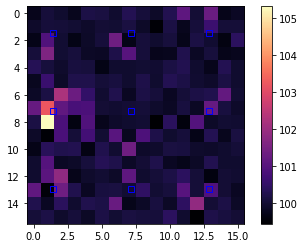

In [35]:
random_index = np.random.randint(images.shape[0])

print(labels[random_index].reshape(lattice_shape))

processor.plot(random_index)